In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy as np
import matplotlib.pyplot as plt
import pickle

from EnvLibs import getEnvConfig, createEnv, visualizeEnvConfig, PolicyDemoAdaptiveAlpha, PolicySimulator
from DrlLibs.evaluate import load_and_evaluate

In [2]:
configIdx = 0
params = getEnvConfig(configIdx)
visualizeEnvConfig(params)
env = createEnv(params)

Environment Configuration
Number of Users:        4
Window Length:          10
Dataflow:               thumb_fr
Resource Bar:           4
Bandwidth:              40
M List:                 [2, 3]
Random Seed:            999
Alpha Range:            (0.01, 1.0)
Discrete Alpha Steps:   10


In [4]:
# ==== Prepare Policy====
with open(f'Results/MdpPolicy/mdpKernel_config{configIdx}.pkl', 'rb') as f:
    mdpPolicy = pickle.load(f)
adaptiveAlphaPolicy = PolicyDemoAdaptiveAlpha(params)

# ==== Prepare Simulator====
policySimulator = PolicySimulator(mdpPolicy, env)
rewardRecord_mdp = policySimulator.runSimulation(mdpPolicy, num_epochs=5000, mode="test", type="data")
rewardRecord_adaptive = policySimulator.runSimulation(adaptiveAlphaPolicy, num_epochs=5000, mode="test", type="data")

# ==== Evaluate Policy====
_, eval_results = load_and_evaluate(params, env, 
                  f'Results/DrlAgent/SAC_configure{configIdx}.zip', 
                  'SAC', 
                  num_episodes=10)
rewardRecord_drl = eval_results['episode_loss_rates']

Loading SAC model from Results/DrlAgent/SAC_configure0.zip

Evaluating SAC Agent
Evaluation Results:
  Average Reward: -37.0849 ± 6.9483
  Average Loss Rate: 0.0408 ± 0.0078
  Average Alpha: 0.6739
  Average Episode Length: 1000.00


Average Reward MDP:      0.0053
Average Reward Adaptive: 0.0269
Average Reward DRL:      0.0408


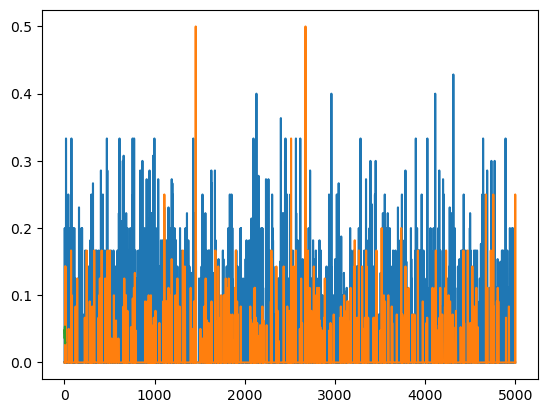

In [6]:
print(f"Average Reward MDP:      {np.mean(rewardRecord_mdp):.4f}")
print(f"Average Reward Adaptive: {np.mean(rewardRecord_adaptive):.4f}")
print(f"Average Reward DRL:      {np.mean(rewardRecord_drl):.4f}")

plt.plot(rewardRecord_adaptive, label="adaptive")
plt.plot(rewardRecord_mdp, label="mdp")
plt.plot(rewardRecord_drl, label="drl")
plt.show()